In [1]:
import sklearn.svm as svm
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn import model_selection, preprocessing
import collections
import pickle
import random
from scipy import misc
from imageio import imread

dim_x = 70
dim_y = 70

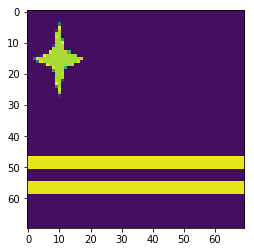

[[77 77 77 ... 77 77 77]
 [77 77 77 ... 77 77 77]
 [77 77 77 ... 77 77 77]
 ...
 [77 77 77 ... 77 77 77]
 [77 77 77 ... 77 77 77]
 [77 77 77 ... 77 77 77]]
(70, 70)
4900


In [2]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (dim_x, dim_y)))[
    :, :, 0] for file in onlyfiles]  # screws up image color, but down to 2 dimensions
plt.imshow(images[0])
plt.show()
print(images[0])
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

In [3]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = [div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})]
flags = [div.find("img")["src"][-11:-9] for div in html.find_all("div", attrs={"class": "flag-image"})]
map = {flags[i]: div_names[i] for i in range(len(flags))}
map = collections.OrderedDict(sorted(map.items()))
print(map)

OrderedDict([('AA', 'Aruba'), ('AC', 'Antigua and Barbuda'), ('AE', 'United Arab Emirates'), ('AF', 'Afghanistan'), ('AG', 'Algeria'), ('AJ', 'Azerbaijan'), ('AL', 'Albania'), ('AM', 'Armenia'), ('AN', 'Andorra'), ('AO', 'Angola'), ('AQ', 'American Samoa'), ('AR', 'Argentina'), ('AS', 'Australia'), ('AT', 'Ashmore and Cartier Islands'), ('AU', 'Austria'), ('AV', 'Anguilla'), ('AX', 'Akrotiri'), ('BA', 'Bahrain'), ('BB', 'Barbados'), ('BC', 'Botswana'), ('BD', 'Bermuda'), ('BE', 'Belgium'), ('BF', 'Bahamas, The'), ('BG', 'Bangladesh'), ('BH', 'Belize'), ('BK', 'Bosnia and Herzegovina'), ('BL', 'Bolivia'), ('BM', 'Burma'), ('BN', 'Benin'), ('BO', 'Belarus'), ('BP', 'Solomon Islands'), ('BQ', 'Navassa Island'), ('BR', 'Brazil'), ('BT', 'Bhutan'), ('BU', 'Bulgaria'), ('BV', 'Bouvet Island'), ('BX', 'Brunei'), ('BY', 'Burundi'), ('CA', 'Canada'), ('CB', 'Cambodia'), ('CD', 'Chad'), ('CE', 'Sri Lanka'), ('CF', 'Congo, Republic of the'), ('CG', 'Congo, Democratic Republic of the'), ('CH', 'Ch

                Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
0                 Aruba  0.301961  0.301961  0.301961  0.301961  0.301961   
1   Antigua and Barbuda  0.384314  0.000000  0.000000  0.000000  0.000000   
2  United Arab Emirates  0.745098  0.745098  0.745098  0.745098  0.745098   
3           Afghanistan  0.000000  0.000000  0.000000  0.000000  0.000000   
4               Algeria  0.117647  0.117647  0.117647  0.117647  0.117647   

    Pixel 6   Pixel 7   Pixel 8   Pixel 9     ...      Pixel 4891  Pixel 4892  \
0  0.301961  0.301961  0.301961  0.301961     ...        0.301961    0.301961   
1  0.000000  0.000000  0.000000  0.000000     ...        0.745098    0.745098   
2  0.745098  0.745098  0.745098  0.745098     ...        0.000000    0.000000   
3  0.000000  0.000000  0.000000  0.000000     ...        0.066667    0.066667   
4  0.117647  0.117647  0.117647  0.117647     ...        0.964706    0.964706   

   Pixel 4893  Pixel 4894  Pixel 4895  Pixel 4896 

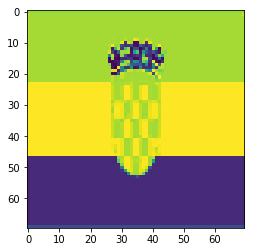

In [4]:
df = pd.DataFrame({"Country": [val for key, val in map.items()]})

for i in range(dim_x*dim_y):
    pixels = [images[x][int(i/dim_x)][i%dim_y] for x in range(len(images))]
    df["Pixel " + str(i + 1)] = np.array(pixels) / 255.0
print(df.head())
plt.imshow(images[100])
plt.show()

In [5]:
# If you're creating model for first time

model = svm.SVC(gamma=0.001, C=1000)
x = df[df.columns.values[1:]]
y = df.Country
model.fit(x, y)
file = open("/Users/rohitneppalli/Downloads/svm_model", "wb")
pickle.dump(model, file)
file.close()

# Otherwise, load in model
# file = open("/Users/rohitneppalli/Downloads/svm_model", "rb")
# model = pickle.load(file)

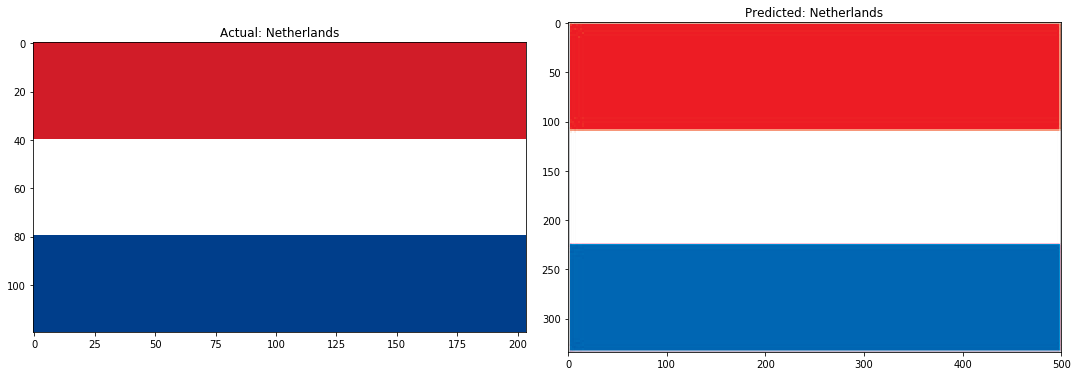

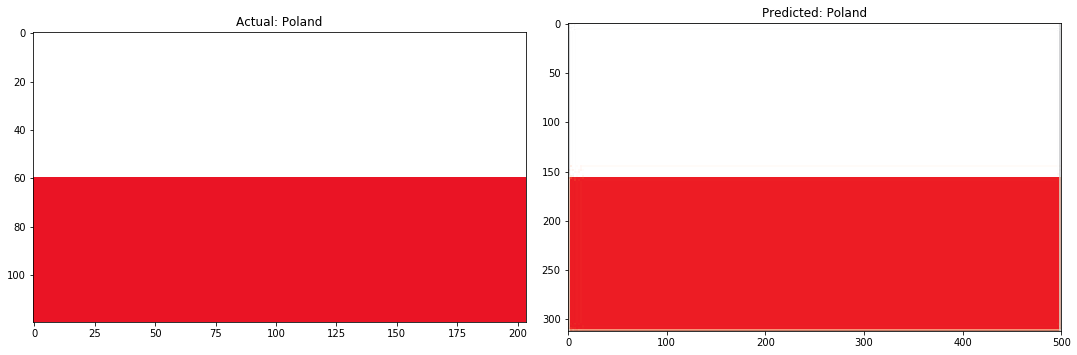

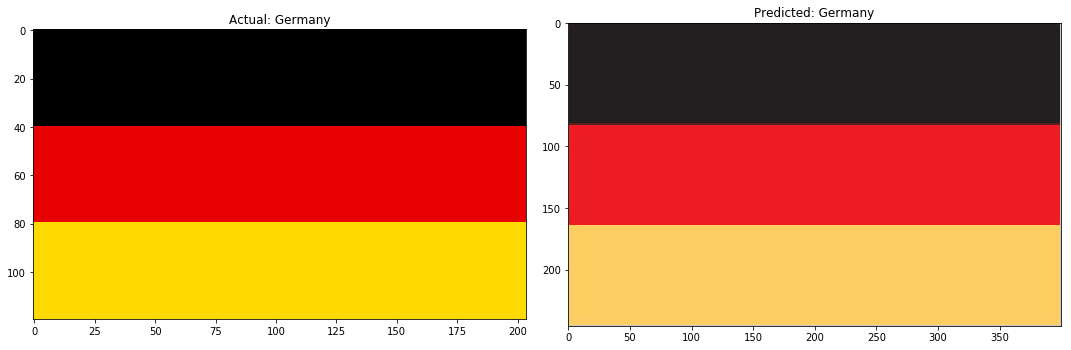

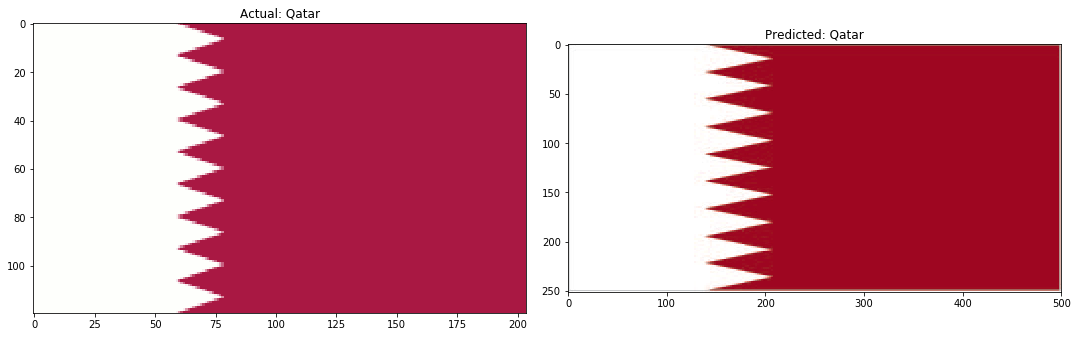

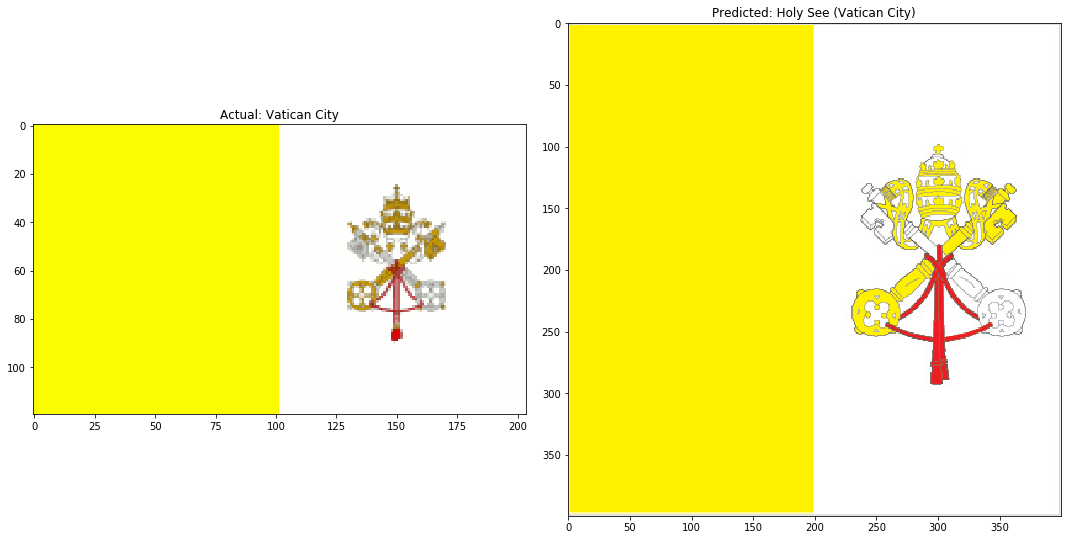

In [6]:
mypath = "/Users/rohitneppalli/Downloads/Test Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath, f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])

num_to_test = 5
test_images = [random.choice(onlyfiles) for i in range(num_to_test)]

for i in range(len(test_images)):
    f, axarr = plt.subplots(1, 2)
    f.set_figheight(15)
    f.set_figwidth(15)
    f.tight_layout()
    img = test_images[i]
    img_array = np.array(cv2.resize(mpimg.imread(img, 0), (dim_x, dim_y)))[:, :, 0]
    pixels = [img_array[int(i/dim_x)][i % dim_y] for i in range(dim_x*dim_y)]
    pixels = np.array(pixels) / 255.0
    axarr[0].imshow(mpimg.imread(img, 0))
    axarr[0].title.set_text("Actual: {0}".format(img[img.find("of-") + 3:img.find(".")].replace("-", " ")))
    prediction = model.predict(pixels.reshape(-1, dim_x*dim_y))

    short_hand = [key for key, value in map.items() if value == prediction][0]
    prediction_image = "/Users/rohitneppalli/Downloads/Flags/{0}-flag.png".format(short_hand)
    axarr[1].imshow(mpimg.imread(prediction_image, 0))
    axarr[1].title.set_text("Predicted: {0}".format(prediction[0]))

    #print(prediction[0])

In [7]:
def checkAccuracy():
    correct = 0
    for img in onlyfiles:
        img_array = np.array(cv2.resize(mpimg.imread(
            img, 0), (dim_x, dim_y)))[:, :, 0]
        pixels = [img_array[int(i/dim_x)][i % dim_y]
              for i in range(dim_x*dim_y)]
        pixels = np.array(pixels) / 255.0
        prediction = model.predict(pixels.reshape(-1, dim_x*dim_y))
        pred_formatted = prediction[0].replace(
            ",", "").replace("Saint", "St").replace(" and ", " ")
        img_formatted = img.lower().replace("-", " ")
        if pred_formatted.lower().split(" ")[0] in img_formatted:
            correct+=1
        else:
            pass
            print("Prediction: {0}\nActual: {1}".format(
                pred_formatted, img[img.find("of-") + 3:img.find(".")].replace("-", " ")))
    print("Accuracy: {0}".format(correct/len(onlyfiles)))
checkAccuracy()

Prediction: Mali
Actual: Andorra
Prediction: Bulgaria
Actual: Armenia
Prediction: Heard Island McDonald Islands
Actual: Australia
Prediction: Denmark
Actual: Austria
Prediction: Luxembourg
Actual: Belarus
Prediction: Guam
Actual: Belize
Prediction: Cameroon
Actual: Benin
Prediction: Japan
Actual: Bhutan
Prediction: Micronesia Federated States of
Actual: Botswana
Prediction: Russia
Actual: Bulgaria
Prediction: Japan
Actual: Canada
Prediction: Romania
Actual: Chad
Prediction: Japan
Actual: Cyprus
Prediction: Czechia
Actual: Czech Republic
Prediction: Austria
Actual: Denmark
Prediction: Netherlands
Actual: Egypt
Prediction: Azerbaijan
Actual: El Salvador
Prediction: Tuvalu
Actual: Fiji
Prediction: Romania
Actual: France
Prediction: Afghanistan
Actual: Guatemala
Prediction: Madagascar
Actual: Guinea Bissau
Prediction: Azerbaijan
Actual: Honduras
Prediction: Netherlands
Actual: Hungary
Prediction: Bolivia
Actual: India
Prediction: Netherlands
Actual: Iraq
Prediction: San Marino
Actual: Kiri

[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
Prediction: Jamaica


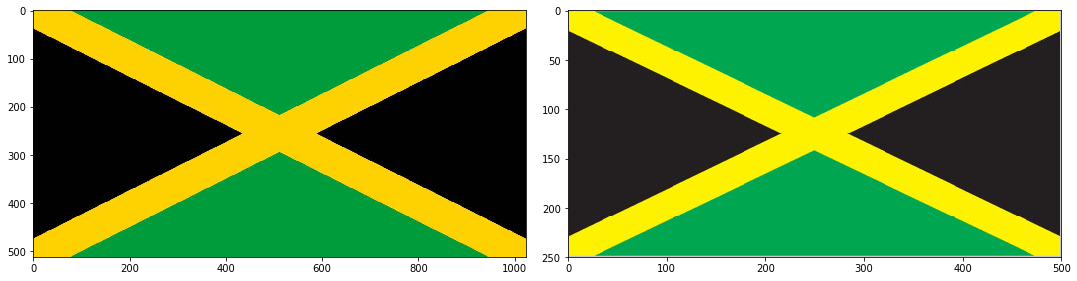

In [8]:
def predictImage(path, x = 0, num_to_test = 1):
    f, axarr = plt.subplots(num_to_test, 2)
    f.set_figheight(15)
    f.set_figwidth(15)
    f.tight_layout()
    img = path
    img_array = np.array(cv2.resize(mpimg.imread(
        img, 0), (dim_x, dim_y)))[:, :, 0]
    pixels = [img_array[int(i/dim_x)][i % dim_y]
              for i in range(dim_x*dim_y)]
    pixels = np.array(pixels) / 255.0
    print(pixels)
    axarr[0].imshow(mpimg.imread(img, 0))
    prediction = model.predict(pixels.reshape(-1, dim_x*dim_y))

    short_hand = [key for key, value in map.items() if value == prediction][0]
    prediction_image = "/Users/rohitneppalli/Downloads/Flags/{0}-flag.png".format(
        short_hand)
    axarr[1].imshow(mpimg.imread(prediction_image, 0))

    print("Prediction: {0}".format(prediction[0]))

predictImage("/Users/rohitneppalli/Downloads/ja.png")